<h2><center> Windows Store EDA

In [1]:
pwd

'C:\\Users\\Red'

In [2]:
cd E:\Data Analysis Study\Project

E:\Data Analysis Study\Project


In [3]:
!pip install opendatasets --upgrade -quit


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -u


In [4]:
dataset_url = 'https://www.kaggle.com/vishnuvarthanrao/windows-store/code'

In [7]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: heyrobin
Your Kaggle Key: ········


100%|█████████████████████████████████████████████████████████████████████████████| 93.1k/93.1k [00:00<00:00, 2.72MB/s]

In [9]:
data_dir = './windows-store'

In [135]:
import os 
os.listdir(data_dir)

['archive.zip', 'msft.csv']

<h1> CLEANING

In [566]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [641]:
df = pd.read_csv('windows-store\msft.csv')

In [702]:
df

,Name,Rating,No of people Rated,Category,Date,Price
0,Dynamic Reader,3.5,268,Books,07-01-2014,0.0
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,08-01-2014,0.0
2,BookViewer,3.5,593,Books,29-02-2016,0.0
3,Brick Instructions,3.5,684,Books,30-01-2018,0.0
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,30-01-2018,0.0
...,...,...,...,...,...,...
5316,Get Color,3.0,785,Developer Tools,08-08-2019,54.5
5317,JS King,1.0,720,Developer Tools,19-07-2018,269.0
5318,MQTTSniffer,2.5,500,Developer Tools,10-04-2017,64.0
5319,"Dev Utils - JSON, CSV and XML",4.0,862,Developer Tools,18-11-2019,269.0


In [643]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5322 entries, 0 to 5321
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                5321 non-null   object 
 1   Rating              5321 non-null   float64
 2   No of people Rated  5322 non-null   int64  
 3   Category            5321 non-null   object 
 4   Date                5321 non-null   object 
 5   Price               5321 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 249.6+ KB


In [638]:
df.isnull().sum()

5164

In [699]:
df.describe()

,Rating,No of people Rated,Price
count,5322.000000,5322.000000,5322.000000
mean,3.791995,551.873168,11.010184
std,0.992950,259.820088,117.191998
min,0.000000,100.000000,0.000000
25%,3.500000,327.000000,0.000000
50%,4.000000,548.000000,0.000000
75%,4.500000,779.000000,0.000000
max,5.000000,1000.000000,5449.000000


In [645]:
df.fillna(0, inplace = True)
df

,Name,Rating,No of people Rated,Category,Date,Price
0,Dynamic Reader,3.5,268,Books,07-01-2014,Free
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,08-01-2014,Free
2,BookViewer,3.5,593,Books,29-02-2016,Free
3,Brick Instructions,3.5,684,Books,30-01-2018,Free
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,30-01-2018,Free
...,...,...,...,...,...,...
5317,JS King,1.0,720,Developer Tools,19-07-2018,₹ 269.00
5318,MQTTSniffer,2.5,500,Developer Tools,10-04-2017,₹ 64.00
5319,"Dev Utils - JSON, CSV and XML",4.0,862,Developer Tools,18-11-2019,₹ 269.00
5320,Simply Text,4.0,386,Developer Tools,23-01-2014,₹ 219.00


Convert Free Price to 0

In [701]:
df.drop(index=5321, inplace = True)

In [225]:
df

,Name,Rating,No of people Rated,Category,Date,Price
0,Dynamic Reader,3.5,268,Books,07-01-2014,Free
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,08-01-2014,Free
2,BookViewer,3.5,593,Books,29-02-2016,Free
3,Brick Instructions,3.5,684,Books,30-01-2018,Free
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,30-01-2018,Free
...,...,...,...,...,...,...
5316,Get Color,3.0,785,Developer Tools,08-08-2019,₹ 54.50
5317,JS King,1.0,720,Developer Tools,19-07-2018,₹ 269.00
5318,MQTTSniffer,2.5,500,Developer Tools,10-04-2017,₹ 64.00
5319,"Dev Utils - JSON, CSV and XML",4.0,862,Developer Tools,18-11-2019,₹ 269.00


In [249]:

df =df.replace('Free',00.00)

- most rated book
- most rated product
- most sold produce
- types of product
- most expensive product
- total no of free product


Most Rated Product

In [226]:
MRP = df.groupby(['Category']).sum()['Rating'].reset_index()

In [227]:
MRP = MRP.sort_values('Rating', ascending = False)
MRP

,Category,Rating
9,Music,2831.0
0,Books,2680.5
1,Business,2446.0
5,Health and Fitness,1995.0
2,Developer Tools,1943.0
7,Lifestyle,1894.5
11,News and Weather,1853.5
6,Kids and Family,1362.0
12,Social,1262.0
3,Food and Dining,629.0


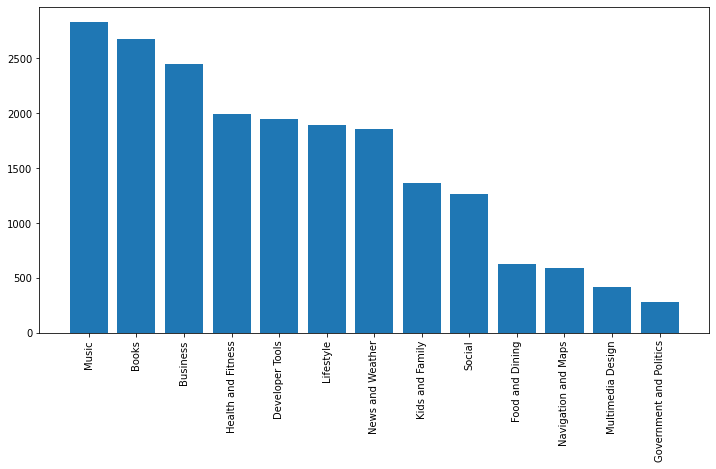

In [243]:
plt.figure(figsize=(12,6))
plt.bar(MRP.Category,MRP.Rating)
plt.xticks(rotation='vertical');

most expensive product


In [698]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5322 entries, 0 to 5321
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                5322 non-null   object 
 1   Rating              5322 non-null   float64
 2   No of people Rated  5322 non-null   int64  
 3   Category            5322 non-null   object 
 4   Date                5322 non-null   object 
 5   Price               5322 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 249.6+ KB


In [738]:
df = pd.read_csv('windows-store\msft.csv')

In [739]:
df.dtypes

Name                   object
Rating                float64
No of people Rated      int64
Category               object
Date                   object
Price                  object
dtype: object

In [746]:
df.Price.unique()

array([0, '144.00', '54.00', '99.00', '219.00', '269.00', '134.00',
       '164.00', '109.00', '1624.00', '1099.00', '1349.00', '59.00',
       '154.00', '119.00', '94.00', '69.00', '139.00', '189.00', '549.00',
       '79.00', '2599.00', '299.00', '574.00', '329.40', '1521.80',
       '324.00', '824.00', '5449.00', '89.50', '114.00', '194.00',
       '319.00', '624.00', '2149.00', '1149.00', '434.00', '279.00',
       '209.00', '699.00', '1899.00', '489.00', '54.50', '64.00'],
      dtype=object)

In [745]:
df.fillna(0,inplace=True)

In [741]:
df.Price = df.Price.str.replace('₹ ','').replace('Free','').replace('',np.nan)

In [743]:
df.Price = df.Price.str.replace(',','')

In [747]:
df['Price'] = df['Price'].astype(float)

In [755]:
MEP = df.groupby(['Category']).sum()['Price'].reset_index()

In [783]:
MEP = df.sort_values('Price', ascending = True).tail(10)
MEP

,Name,Rating,No of people Rated,Category,Date,Price
5299,Offline Documentation Browser,1.0,153,Developer Tools,13-03-2020,1149.0
5181,Oxford Dictionary of English,4.0,391,Books,22-07-2014,1349.0
5259,"Grapholite - Diagrams, Flow Charts and Floor P...",4.0,287,Business,22-02-2013,1521.8
5183,"Oxford Advanced Learner's Dictionary, 8th edition",4.0,403,Books,31-01-2013,1624.0
5175,Oxford Dictionary of English and Thesaurus,3.0,290,Books,23-01-2015,1624.0
5255,Office Suite - Powerful editor for Adobe pdf a...,4.0,352,Business,01-12-2017,1624.0
5310,EditPlus,4.0,778,Developer Tools,27-09-2016,1899.0
5295,RocketCake Professional,4.0,691,Developer Tools,08-12-2016,2149.0
5202,EasyReader,4.0,990,Books,10-07-2019,2599.0
5281,Pengwin Enterprise,3.0,368,Developer Tools,29-11-2018,5449.0


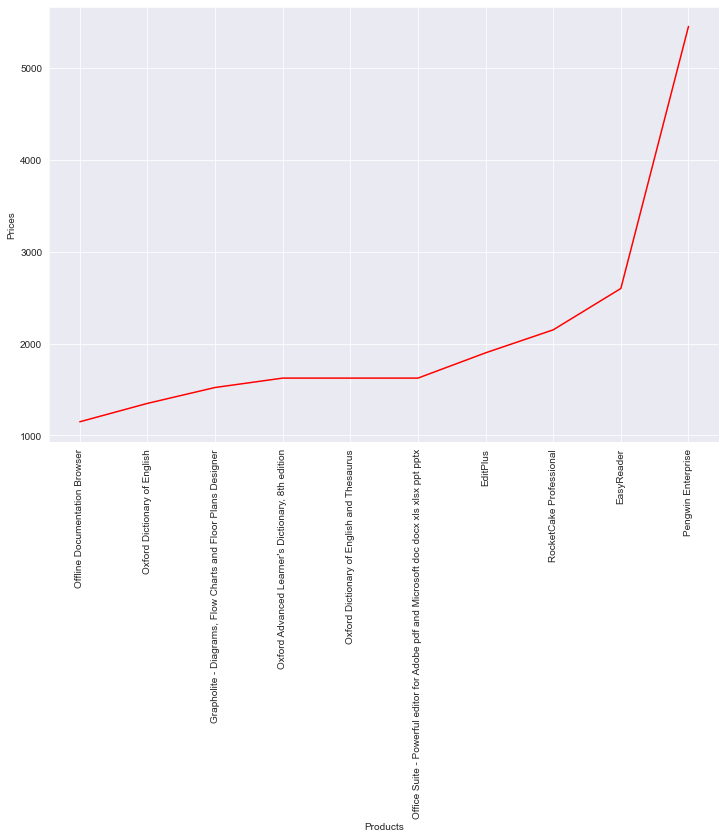

In [799]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
plt.plot(MEP.Name,MEP.Price, 'r');
plt.xticks(rotation='vertical');
plt.xlabel('Products')
plt.ylabel('Prices');